In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=pd.read_csv(r"/Users/princegupta/Documents/data science/dataset/synthetic_placement_data.csv")

In [6]:
dataset.head(3)

,cgpa,score,placed
0,6.50,7.79,0
1,8.80,7.14,1
2,7.93,6.24,1


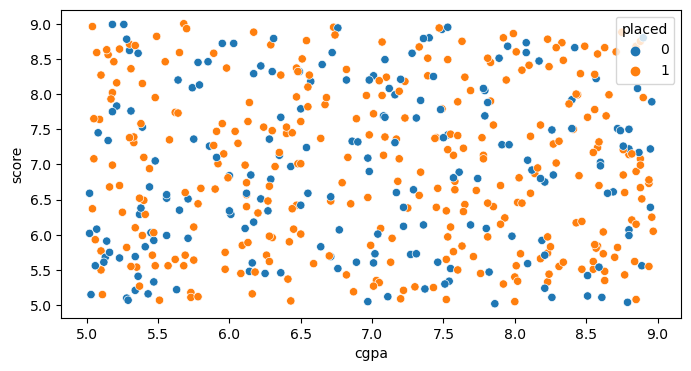

In [7]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="cgpa",y="score",hue="placed",data=dataset)
plt.show()

In [8]:
x=dataset.iloc[:,:-1]
y=dataset["placed"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
x_train.shape,x_test.shape

((400, 2), (100, 2))

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ft=StandardScaler()
x_train_ss=ft.fit_transform(x_train)
x_test_ss=ft.transform(x_test)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train_ss,y_train)

DecisionTreeClassifier()

In [16]:
dtc.score(x_test_ss,y_test)*100,dtc.score(x_train_ss,y_train)*100

(55.00000000000001, 100.0)

In [17]:
dtc.predict([[6.5,7.7]])

array([0])

In [18]:
dtc.predict([[8.8,7.1]])

array([0])

In [19]:
from sklearn.tree import plot_tree

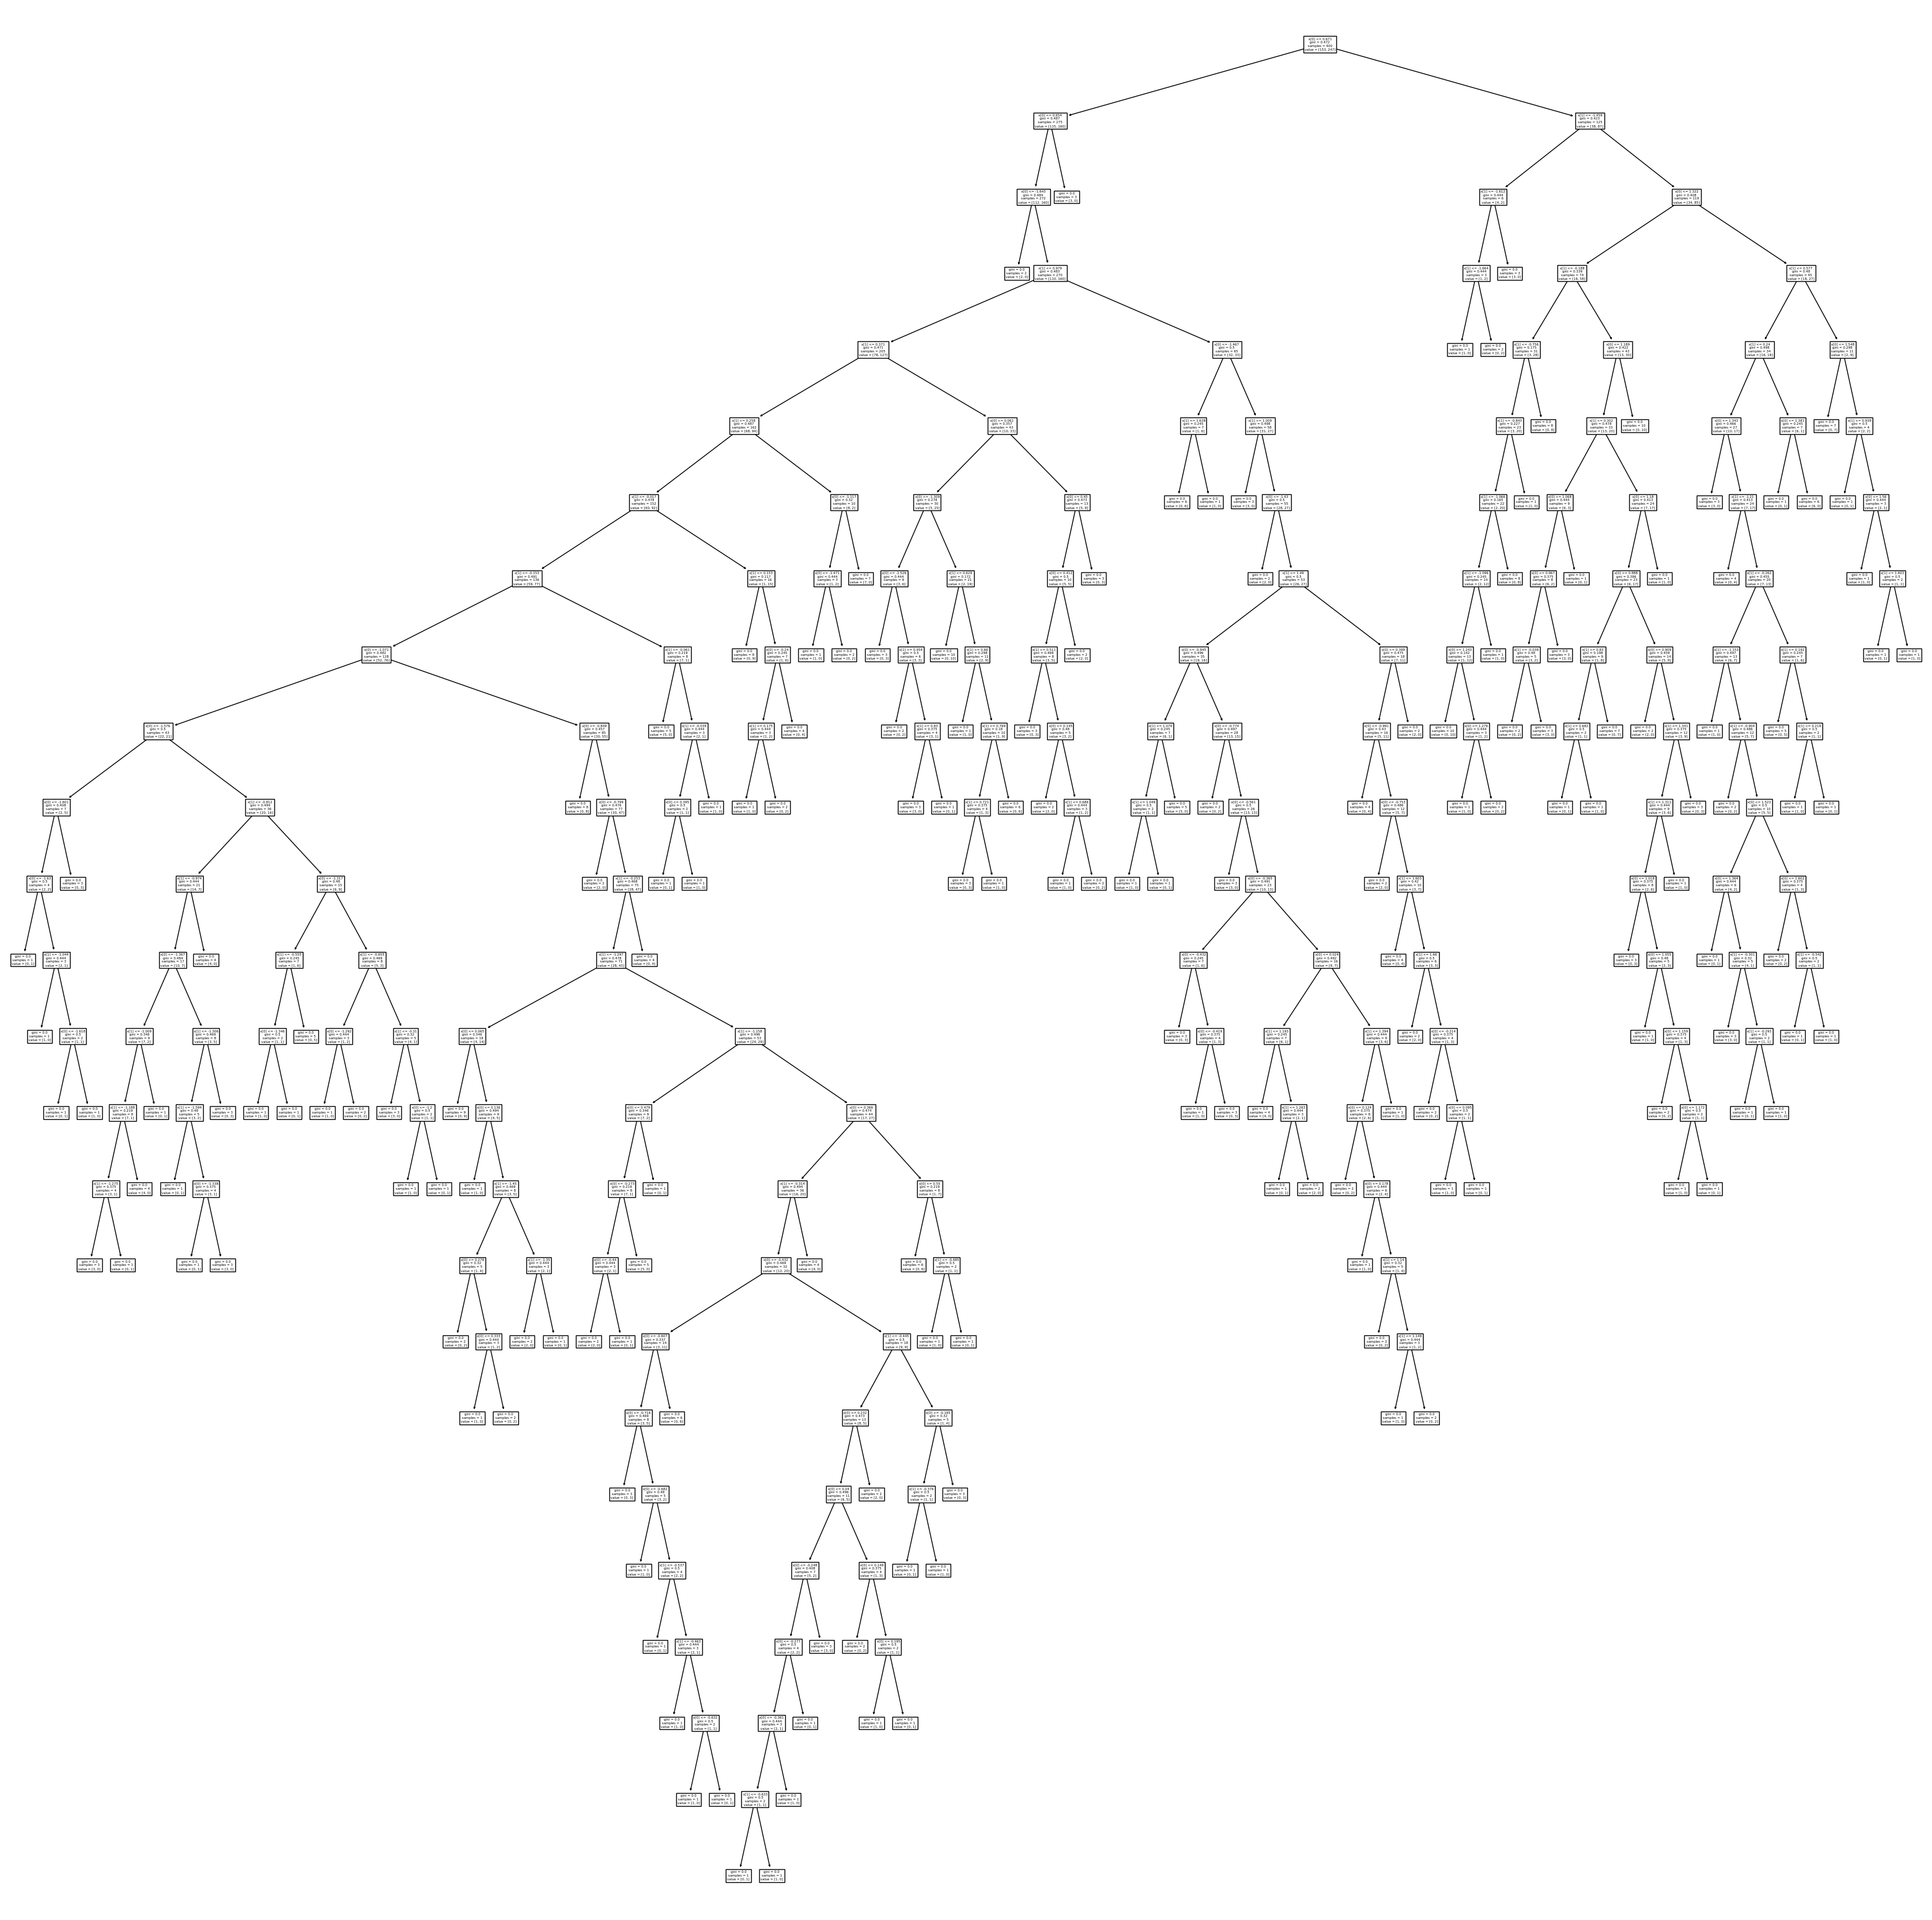

In [20]:
plt.figure(figsize=(40,40))
plot_tree(dtc)
plt.show()

In [21]:
from mlxtend.plotting import plot_decision_regions

In [22]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [23]:
cf=confusion_matrix(y_test,dtc.predict(x_test_ss))
cf

array([[14, 21],
       [24, 41]])

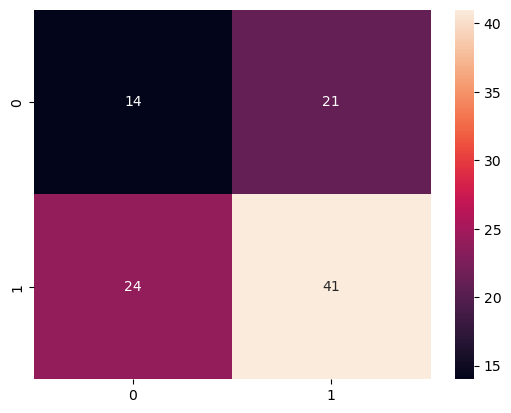

In [24]:
sns.heatmap(cf,annot=True)
plt.show()

In [25]:
dtc1=DecisionTreeClassifier(criterion="entropy")
dtc1.fit(x_train_ss,y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
dtc1.score(x_test_ss,y_test)*100,dtc1.score(x_train_ss,y_train)*100

(59.0, 100.0)

In [27]:
dtc1.predict([[6.5,7.7]])

array([0])

In [28]:
dtc1.predict([[8.8,7.1]])

array([0])

In [29]:
cf=confusion_matrix(y_test,dtc1.predict(x_test_ss))
cf

array([[13, 22],
       [19, 46]])

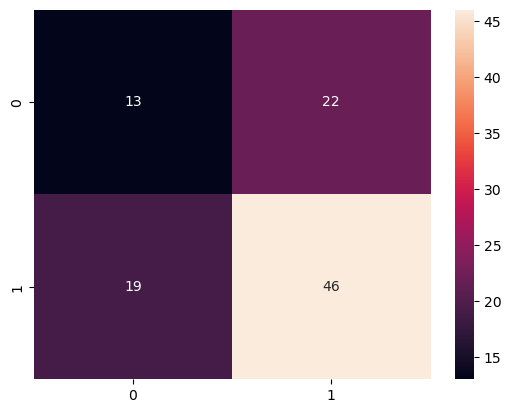

In [30]:
sns.heatmap(cf,annot=True)
plt.show()